# Santander

#### Contents
 - [Readme](#Readme)
 - [1. Import libs](#1.-Import-libs)
 - [2. Get data](#2.-Get-data)
     - [Read data](#Read-data)
     - [Check shape](#Check-shape)
     - [Rename data](#Rename-data)
 - [3. Explore data](#3.-Explore-data)
     - [Explore in a high level](#Explore-in-a-high-level)
     - [Study each attribute and its characteristics](#Study-each-attribute-and-its-characteristics)
         - [do we have duplicated rows?](#do-we-have-duplicated-rows?)
         - [persent of missing data](#%-of-missing-data)
         - [what are unique values for columns with many nulls?](#what-are-unique-values-for-columns-with-many-nulls?)
         - [what are unique values for columns with not any nulls?](#what-are-unique-values-for-columns-with-not-any-nulls?)
         - [compute count per unique value](#compute-count-per-unique-value) 
 - [4. Clean up initial set](#4.-Clean-up-initial-set)
 - [5. Explore data after clenup](#5.-Explore-data-after-clenup)
     - [Numeric features](#Numeric-features)
 - [6. Visualize data](#6.-Visualize-data)
     - [Histograms plots](#Histograms-plots)
     - [Distribution plots](#Distribution-plots)
     - [Boxplots](#Boxplots)
     - [Count Plot for categorical features](#Count-Plot-for-categorical-features)
     - [Relation plots](#Relation-plots)
     - [Pairplot](#Pairplot)
 - [7. Clean up](#7.-Clean-up)
 - [8. Clustering using K-Means](#8.-Clustering-using-K-Means)
     - [K-means parameters and attributes (theory)](#K-means-parameters-and-attributes-theory)
     - [Segmentation using Age and Score](#Segmentation-using-Age-and-Score)
         - [Cluster the dataset without data scaling](#Cluster-the-dataset-without-data-scaling)
         - [Cluster the dataset with data scaling](#Cluster-the-dataset-with-data-scaling)
         

### Readme
[top](#Contents)

In this notebook, data is read and explored.
###### Shape
- bank_ds.shape (200000, 202)
- bank_test_ds.shape (200000, 201)
###### Data types
- There is 1 binary feature (predicted column 'target')
- There are 0 discrete features 
- There are 200 continuous features ('var_1' ... 'var_199')
- There is 1 categorical feature ('ID_code')
- Cardinality (min cardinality = 451 (var_68), max cardinality = 169968 (var_45))
###### Duplicated rows
- No duplicated rows
###### Missing values
No missing values
###### Distributions
- Histograms of [var_1, ..., var_199] remind normal distribution, sometimes there are a few peaks though. However, the Shapiro test says that no normally distributed histograms
###### Outliers
- about 10 features are checked via box plots, and outliers exist
###### Correlation
No correlation between them is noticed between [var_1, ..., var_199]
###### Balance ratio 
- target can be 1 or 0
- 1 in 10.049% of cases
- 0 in 89.951% of cases51
###### Conclusion
- From distribution plots we can see that features seem to be already transformed, they seem to be normally distributed, which is not confirmed by Shapiro test.
- From box plots we can see that some outliers exist.
- From correlation analysis we can see that features are not correlated with each other, the only target has a slight correlation with other fields.
- The data set is imbalanced (10/90)
###### Actions:
- Delete categorical column
- Apply techniques for imbalance data
- Work with outliers:

# 1. Import libs
[top](#Contents)

In [1]:
# pandas and numpy imports
import pandas as pd
import numpy as np

# plotting imports
import matplotlib.pyplot as plt
import seaborn as sns
import plotly as py
import plotly.graph_objs as go

# Suppress Warnings
import warnings
warnings.filterwarnings('ignore')

# set sns theme and set pandas to display all rows and columns
sns.set_theme()

# 2. Get data
[top](#Contents)

#### Read data
[top](#Contents)

In [2]:
bank_ds = pd.read_csv('train.csv')

In [4]:
bank_ds.head(1)

ID_code  target   var_0   var_1    var_2  var_3    var_4   var_5   var_6  \
0  train_0       0  8.9255 -6.7863  11.9081  5.093  11.4607 -9.2834  5.1187   

     var_7  ...  var_190  var_191  var_192  var_193  var_194  var_195  \
0  18.6266  ...   4.4354   3.9642   3.1364    1.691  18.5227  -2.3978   

   var_196  var_197  var_198  var_199  
0   7.8784   8.5635  12.7803  -1.0914  

[1 rows x 202 columns]

#### Check shape
[top](#Contents)

In [6]:
bank_ds.shape

(200000, 202)

In [11]:
bank_ds_0 = bank_ds[bank_ds['target'] == 0]
bank_ds_1 = bank_ds[bank_ds['target'] == 1]

# Optionally, you can reset the index for the new DataFrames
bank_ds_0.reset_index(drop=True, inplace=True)
bank_ds_1.reset_index(drop=True, inplace=True)

bank_ds_1.shape

(20098, 202)

# 3. Explore data
[top](#Contents)

## Explore in a high level
[top](#Contents)

In [9]:
bank_ds_1.describe().T

count       mean        std      min        25%       50%  \
target   20098.0   1.000000   0.000000   1.0000   1.000000   1.00000   
var_0    20098.0  11.156418   3.270293   0.4528   8.695875  11.00135   
var_1    20098.0  -1.017613   4.220638 -14.0370  -4.203475  -0.99265   
var_2    20098.0  11.156633   2.841075   2.9462   8.961125  11.09670   
var_3    20098.0   6.864113   2.070898   0.3740   5.314300   6.90020   
...          ...        ...        ...      ...        ...       ...   
var_195  20098.0  -0.021130   1.485975  -5.0185  -1.103950  -0.05735   
var_196  20098.0   2.688583   5.556892 -14.0204  -1.572225   2.83105   
var_197  20098.0   8.810815   0.952554   6.1190   8.155250   8.79540   
var_198  20098.0  15.393283   3.248123   6.5587  13.232500  15.42795   
var_199  20098.0  -2.532243  10.435910 -38.8528 -10.285050  -1.97185   

               75%      max  
target    1.000000   1.0000  
var_0    13.343700  19.4583  
var_1     2.001375   9.0298  
var_2    13.047025  18.2941  
var_3     8.384725  12.7069  
...            ...      ...  
var_195   0.986450   4.0881  
var_196   6.956250  17.1614  
var_197   9.517000  11.7069  
var_198  17.776425  25.8571  
var_199   5.701475  24.5646  

[201 rows x 8 columns]

In [10]:
# Create a list of tuples containing column names and their respective cardinalities
column_cardinality = [(column, bank_ds_1[column].nunique()) for column in bank_ds_1.columns]

# Sort the list of tuples by cardinality in descending order
column_cardinality_sorted = sorted(column_cardinality, key=lambda x: x[1], reverse=True)

# Create a DataFrame from the sorted list of tuples
result = pd.DataFrame(column_cardinality_sorted, columns=['Column Name', 'Cardinality'])

print(result)


    Column Name  Cardinality
0       ID_code        20098
1        var_45        19755
2       var_117        19669
3        var_74        19640
4        var_61        19628
..          ...          ...
197     var_103         6990
198     var_108         6786
199      var_91         6243
200      var_68          393
201      target            1

[202 rows x 2 columns]


## Study each attribute and its characteristics
[top](#Contents)
- Name  
 - Type (categorical, int/float, bounded/unbounded, text, structured, etc.)
 - % of missing values  
 - Noisiness and type of noise (stochastic, outliers, rounding errors, etc.)
 - Possibly useful for the task?  
 - Type of distribution (Gaussian, uniform, logarithmic, etc.)

### do we have duplicated rows?
[top](#Contents)

In [12]:
duplictaesRows = bank_ds_1[bank_ds_1.duplicated()]
duplictaesRows

Empty DataFrame
Columns: [ID_code, target, var_0, var_1, var_2, var_3, var_4, var_5, var_6, var_7, var_8, var_9, var_10, var_11, var_12, var_13, var_14, var_15, var_16, var_17, var_18, var_19, var_20, var_21, var_22, var_23, var_24, var_25, var_26, var_27, var_28, var_29, var_30, var_31, var_32, var_33, var_34, var_35, var_36, var_37, var_38, var_39, var_40, var_41, var_42, var_43, var_44, var_45, var_46, var_47, var_48, var_49, var_50, var_51, var_52, var_53, var_54, var_55, var_56, var_57, var_58, var_59, var_60, var_61, var_62, var_63, var_64, var_65, var_66, var_67, var_68, var_69, var_70, var_71, var_72, var_73, var_74, var_75, var_76, var_77, var_78, var_79, var_80, var_81, var_82, var_83, var_84, var_85, var_86, var_87, var_88, var_89, var_90, var_91, var_92, var_93, var_94, var_95, var_96, var_97, ...]
Index: []

[0 rows x 202 columns]

#### Group features by type

In [13]:
# Calculate the cardinality of each column
cardinality = bank_ds_1.nunique()

# binary
binary_features = cardinality[cardinality == 2].index.tolist()

# numerical: discrete and continuous
discrete_features = [var for var in bank_ds_1.columns if bank_ds_1[var].dtype!='O' and var!='target'
                     and bank_ds_1[var].nunique()<10 
                     and var not in binary_features]

continuous_features = [var for var in bank_ds_1.columns if bank_ds_1[var].dtype!='O' and var!='target'
                     and var not in binary_features
                     and var not in discrete_features]
# categorical
categorical_features = [var for var in bank_ds_1.columns if bank_ds_1[var].dtype=='O' and var!='target']

# Print the groups of features
print("There are {} binary features".format(len(binary_features)))
print("There are {} discrete features".format(len(discrete_features)))
print("There are {} continuous features".format(len(continuous_features)))
print("There are {} categorical features".format(len(categorical_features)))

There are 0 binary features
There are 0 discrete features
There are 200 continuous features
There are 1 categorical features


In [10]:
categorical_features

['ID_code']

In [11]:
binary_features

['target']

In [14]:
continuous_features

['var_0',
 'var_1',
 'var_2',
 'var_3',
 'var_4',
 'var_5',
 'var_6',
 'var_7',
 'var_8',
 'var_9',
 'var_10',
 'var_11',
 'var_12',
 'var_13',
 'var_14',
 'var_15',
 'var_16',
 'var_17',
 'var_18',
 'var_19',
 'var_20',
 'var_21',
 'var_22',
 'var_23',
 'var_24',
 'var_25',
 'var_26',
 'var_27',
 'var_28',
 'var_29',
 'var_30',
 'var_31',
 'var_32',
 'var_33',
 'var_34',
 'var_35',
 'var_36',
 'var_37',
 'var_38',
 'var_39',
 'var_40',
 'var_41',
 'var_42',
 'var_43',
 'var_44',
 'var_45',
 'var_46',
 'var_47',
 'var_48',
 'var_49',
 'var_50',
 'var_51',
 'var_52',
 'var_53',
 'var_54',
 'var_55',
 'var_56',
 'var_57',
 'var_58',
 'var_59',
 'var_60',
 'var_61',
 'var_62',
 'var_63',
 'var_64',
 'var_65',
 'var_66',
 'var_67',
 'var_68',
 'var_69',
 'var_70',
 'var_71',
 'var_72',
 'var_73',
 'var_74',
 'var_75',
 'var_76',
 'var_77',
 'var_78',
 'var_79',
 'var_80',
 'var_81',
 'var_82',
 'var_83',
 'var_84',
 'var_85',
 'var_86',
 'var_87',
 'var_88',
 'var_89',
 'var_90',
 'var_91'

#### Continuous features

#### Visualize

##### Histogram plots

##### Distribution plots

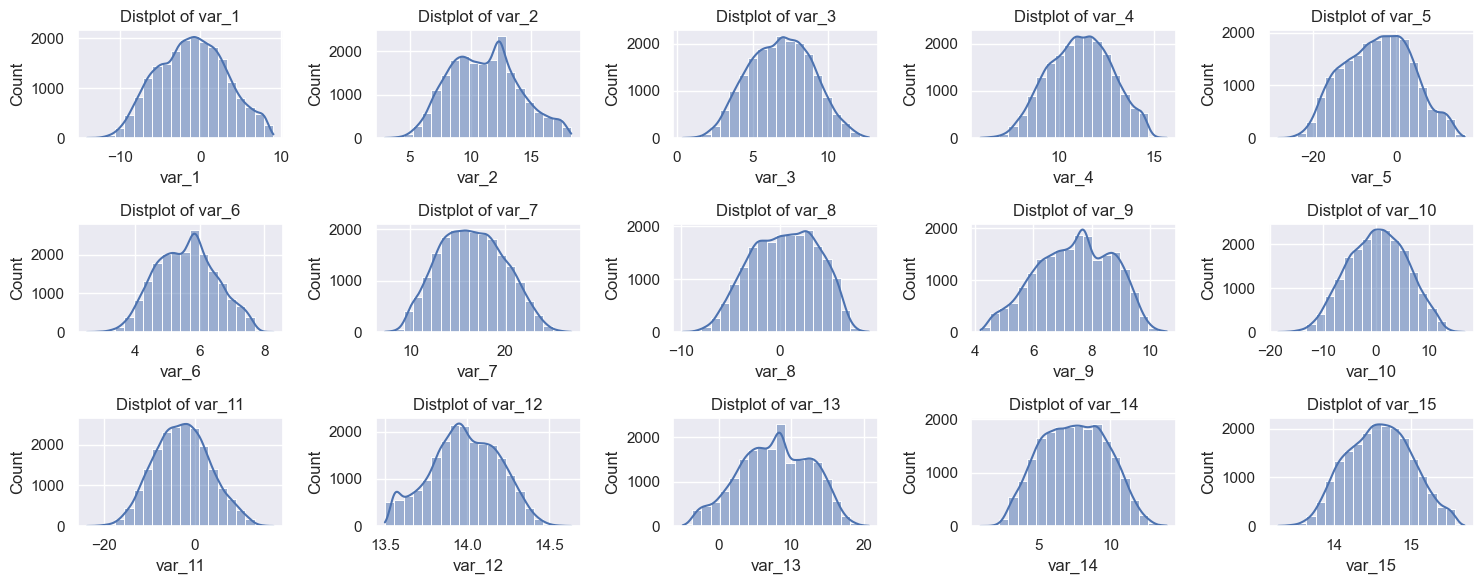

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns

def plot_distribution(data, features, figsize=(15, 6), bins=20):
    num_features = len(features)
    ncols = 5
    nrows = (num_features - 1) // ncols + 1
    
    plt.figure(figsize=figsize)
    for i, feature in enumerate(features, 1):
        plt.subplot(nrows, ncols, i)
        sns.histplot(data=data[feature], bins=bins, kde=True)
        plt.title('Distplot of {}'.format(feature))
    plt.tight_layout()
    plt.show()

# Generate list of features
features_list = ['var_{}'.format(i) for i in range(1, 400)]

# Slice the list if you want to plot a subset of features
features_to_plot = features_list[:15]  # Plot the first 30 features

# Plot distribution of features
plot_distribution(bank_ds_1, features_to_plot)


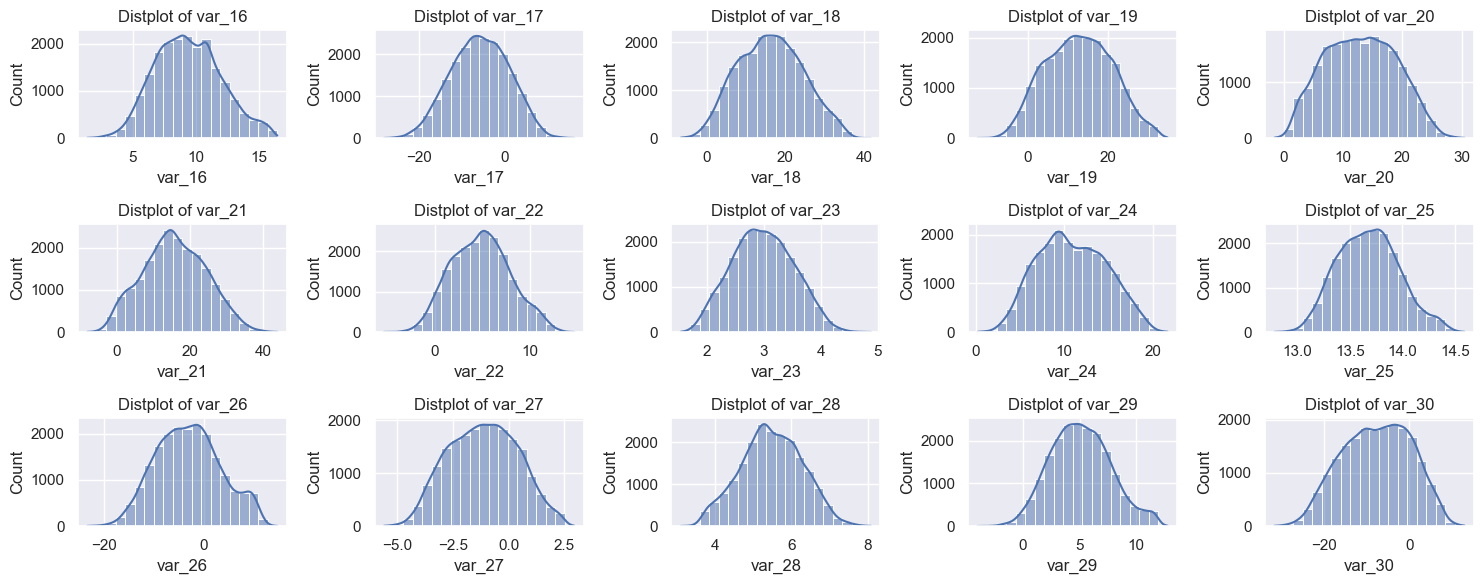

In [16]:
features_to_plot_16_30 = features_list[15:30]  
plot_distribution(bank_ds_1, features_to_plot_16_30)

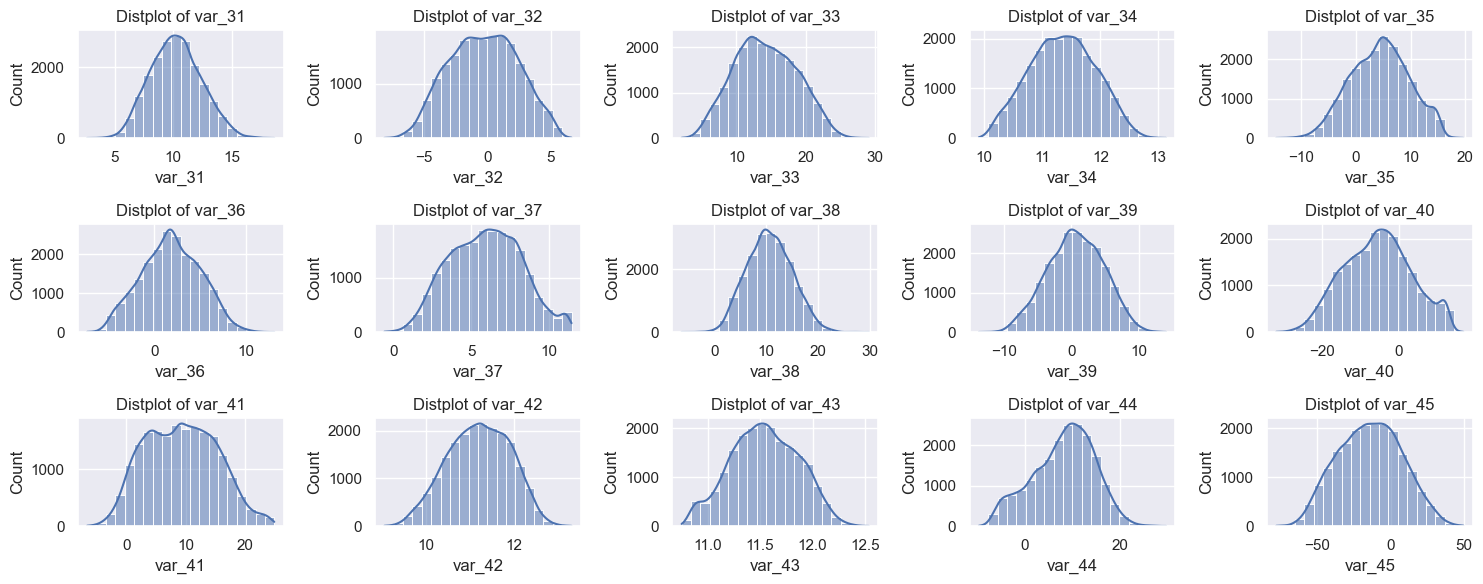

In [17]:
features_to_plot_31_45 = features_list[30:45]  
plot_distribution(bank_ds_1, features_to_plot_31_45)

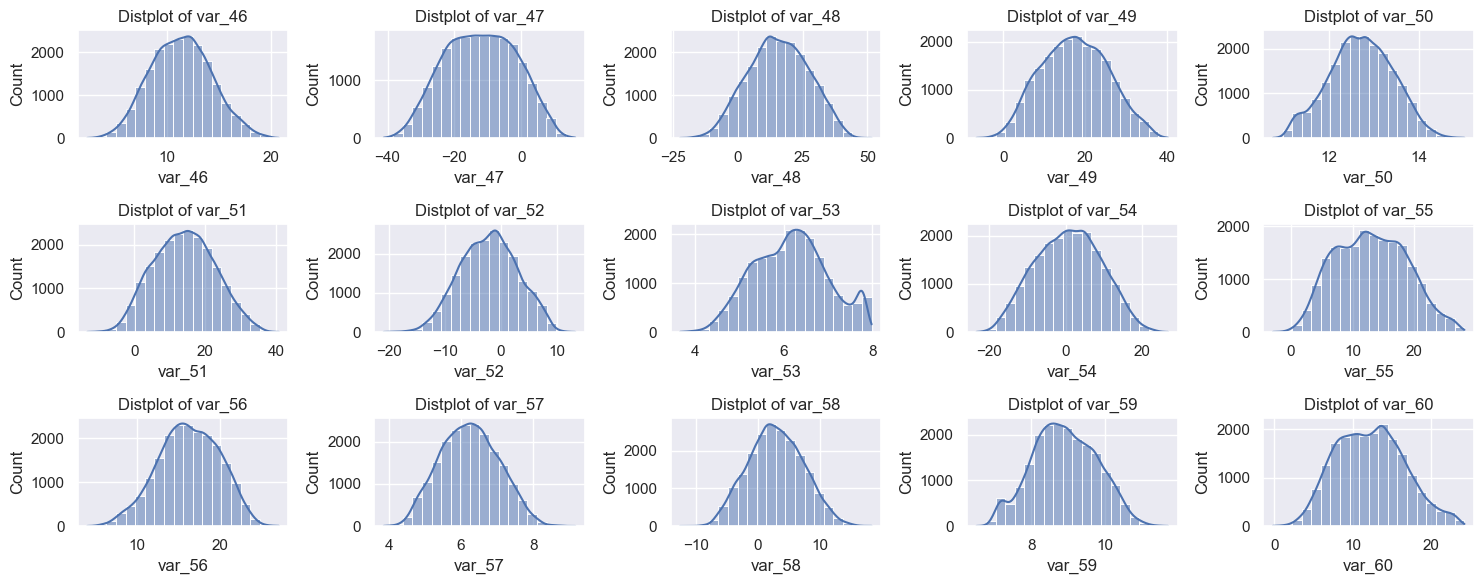

In [18]:
features_to_plot_46_60 = features_list[45:60]  
plot_distribution(bank_ds_1, features_to_plot_46_60)

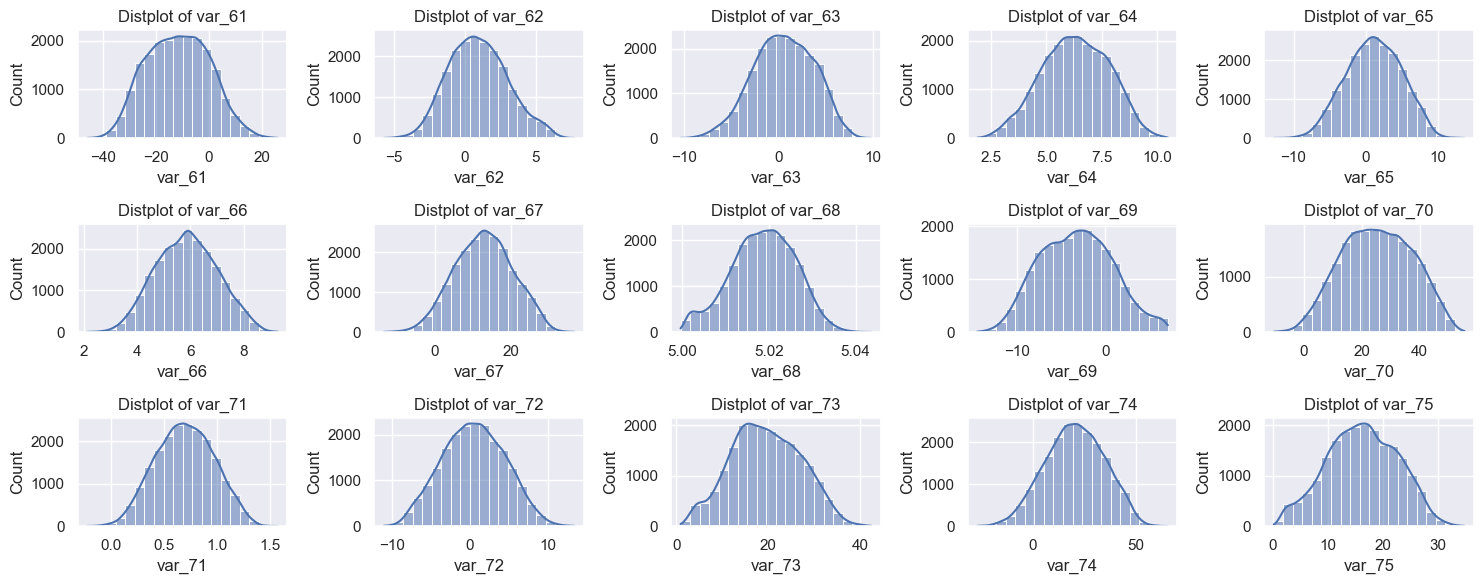

In [19]:
features_to_plot_61_75 = features_list[60:75]  
plot_distribution(bank_ds_1, features_to_plot_61_75)

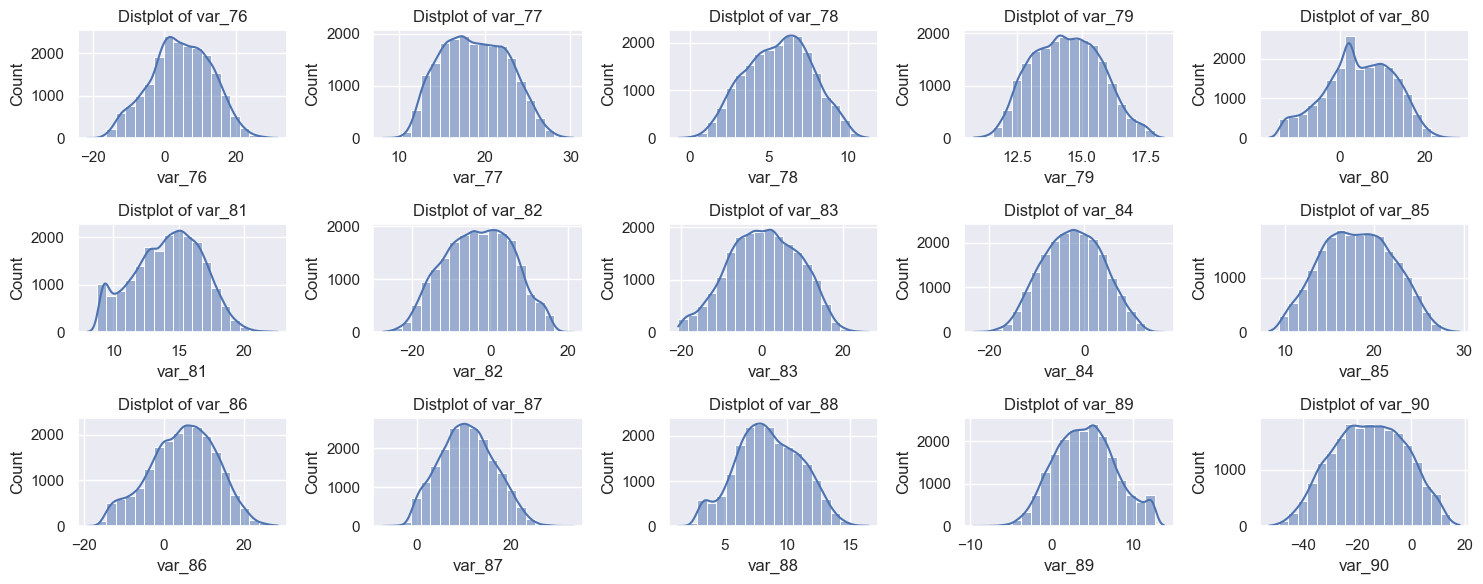

In [20]:
features_to_plot_76_90 = features_list[75:90]  
plot_distribution(bank_ds_1, features_to_plot_76_90)

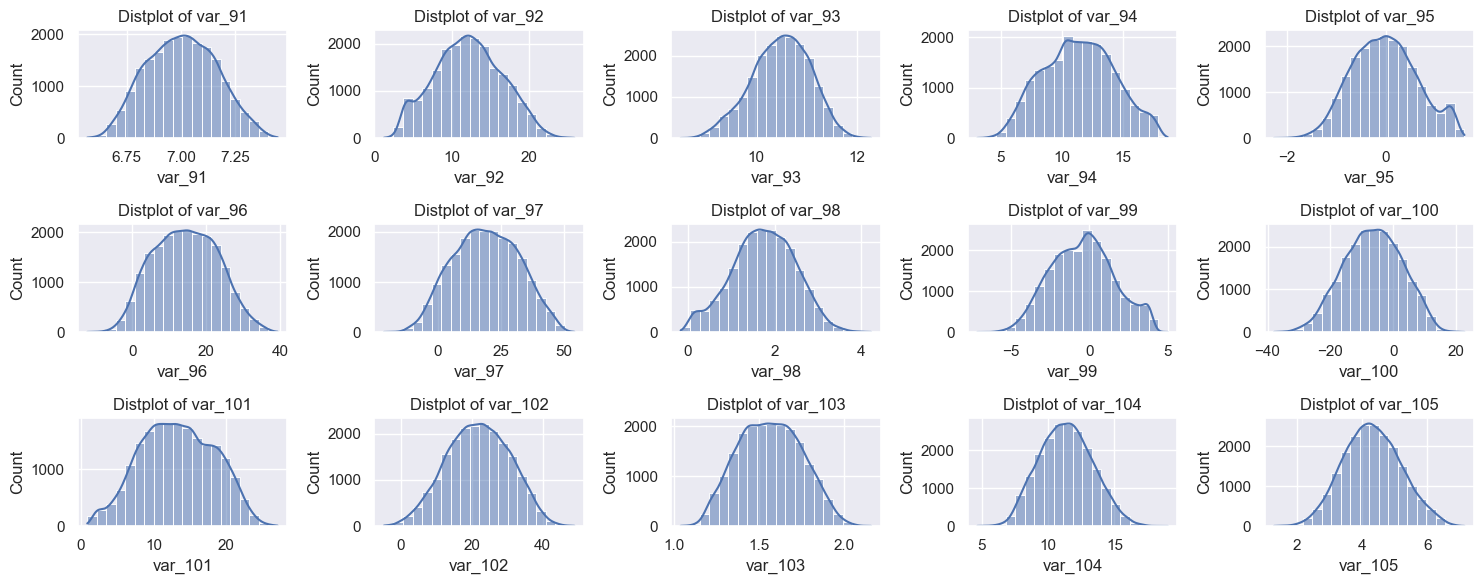

In [21]:
features_to_plot_91_105 = features_list[90:105]  
plot_distribution(bank_ds_1, features_to_plot_91_105)

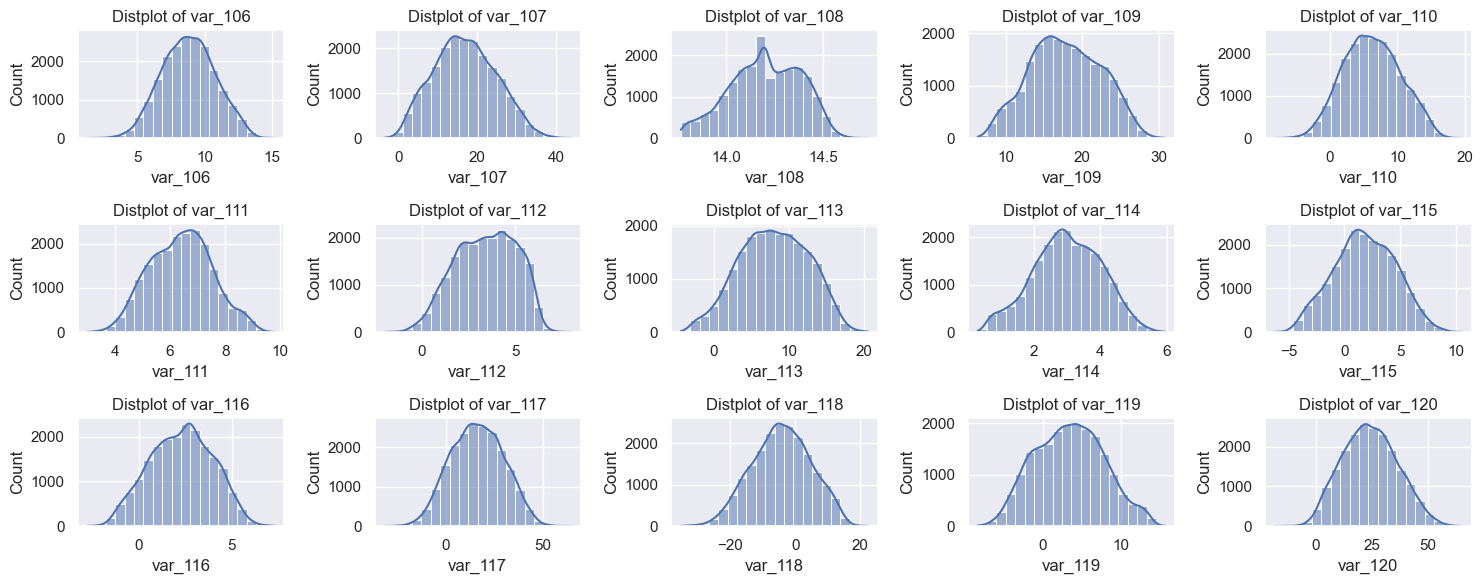

In [22]:
features_to_plot_106_120 = features_list[105:120]  
plot_distribution(bank_ds_1, features_to_plot_106_120)

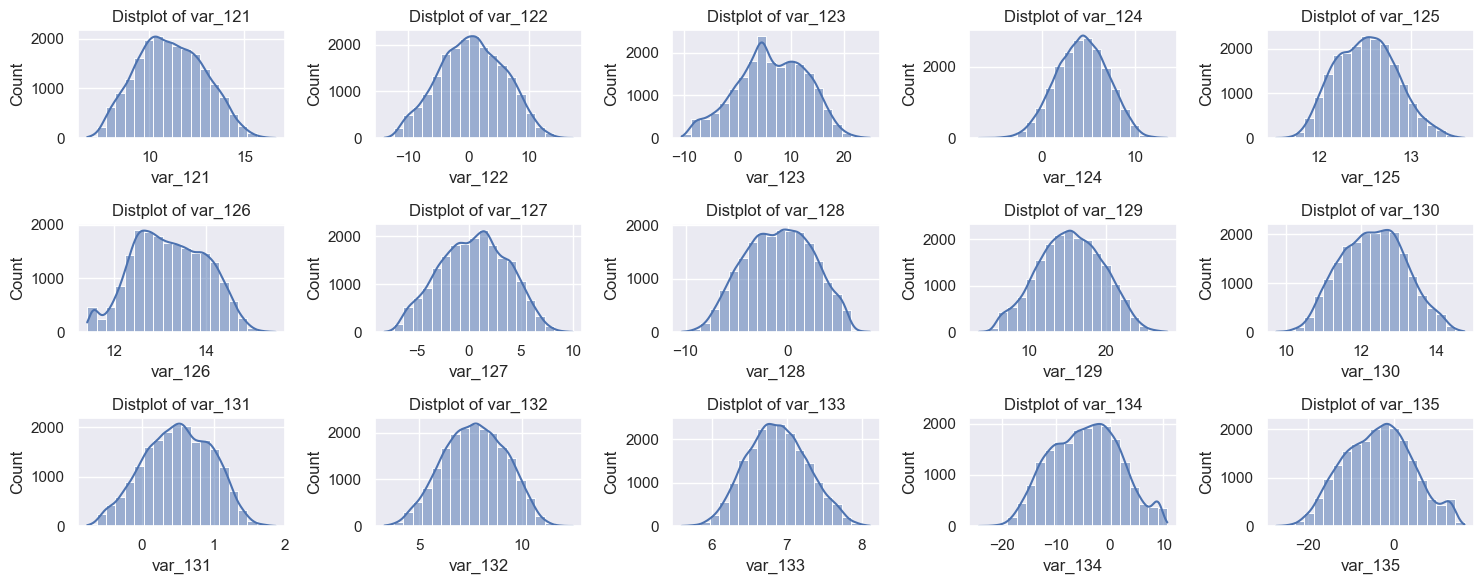

In [23]:
features_to_plot_121_135 = features_list[120:135]  
plot_distribution(bank_ds_1, features_to_plot_121_135)

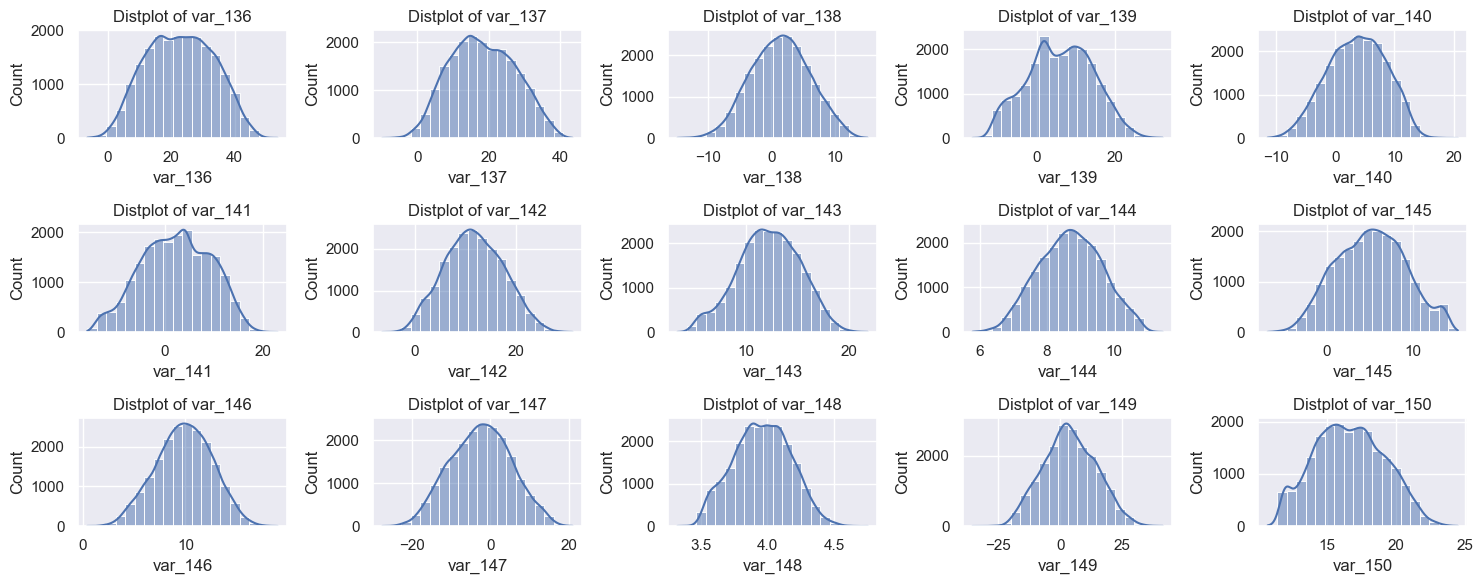

In [24]:
features_to_plot_136_150 = features_list[135:150]  
plot_distribution(bank_ds_1, features_to_plot_136_150)

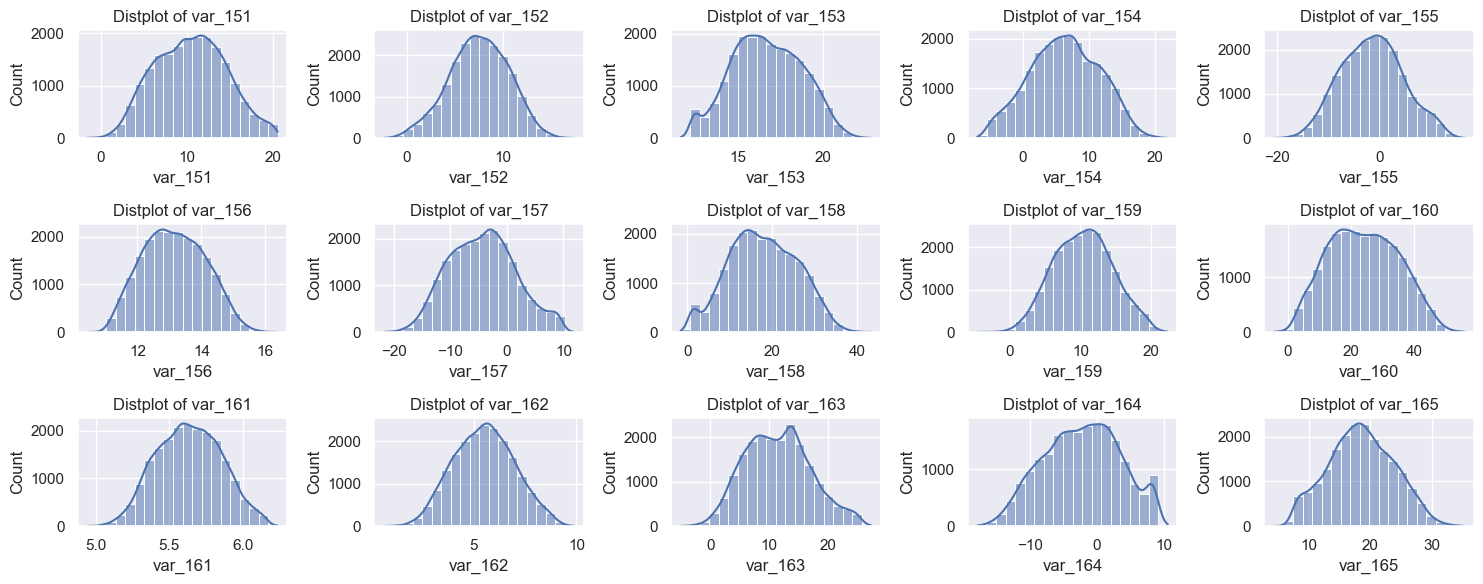

In [25]:
features_to_plot_151_165 = features_list[150:165]  
plot_distribution(bank_ds_1, features_to_plot_151_165)

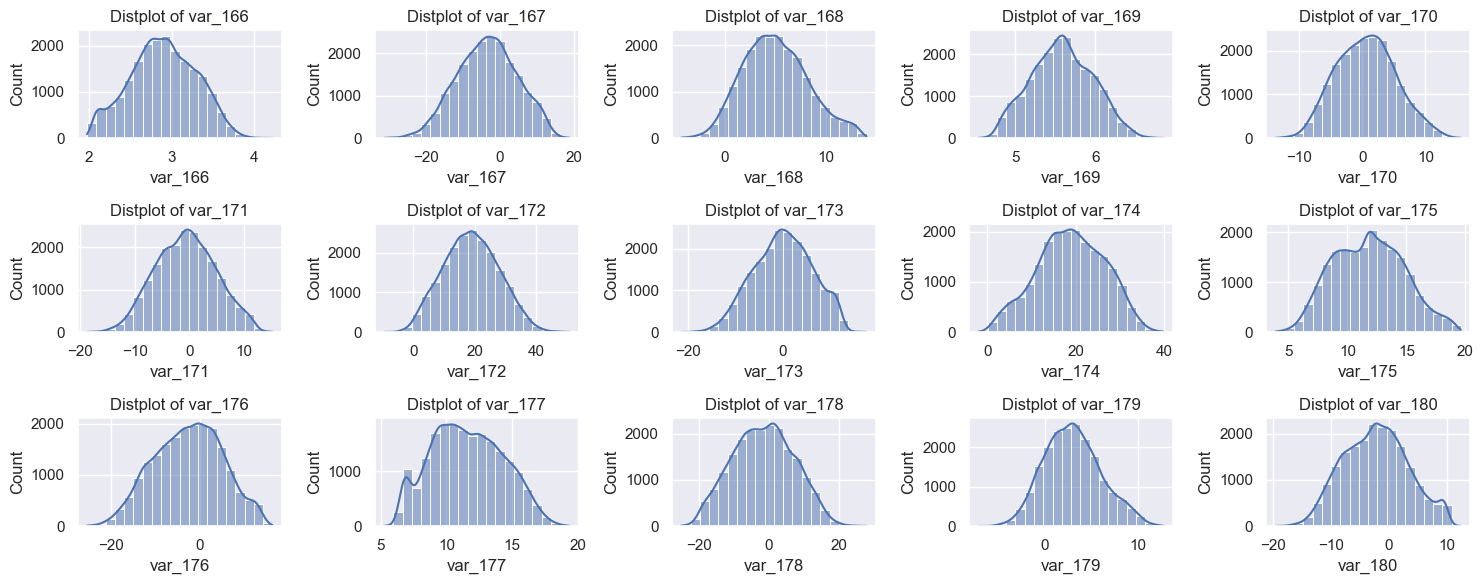

In [26]:
features_to_plot_166_180 = features_list[165:180]  
plot_distribution(bank_ds_1, features_to_plot_166_180)

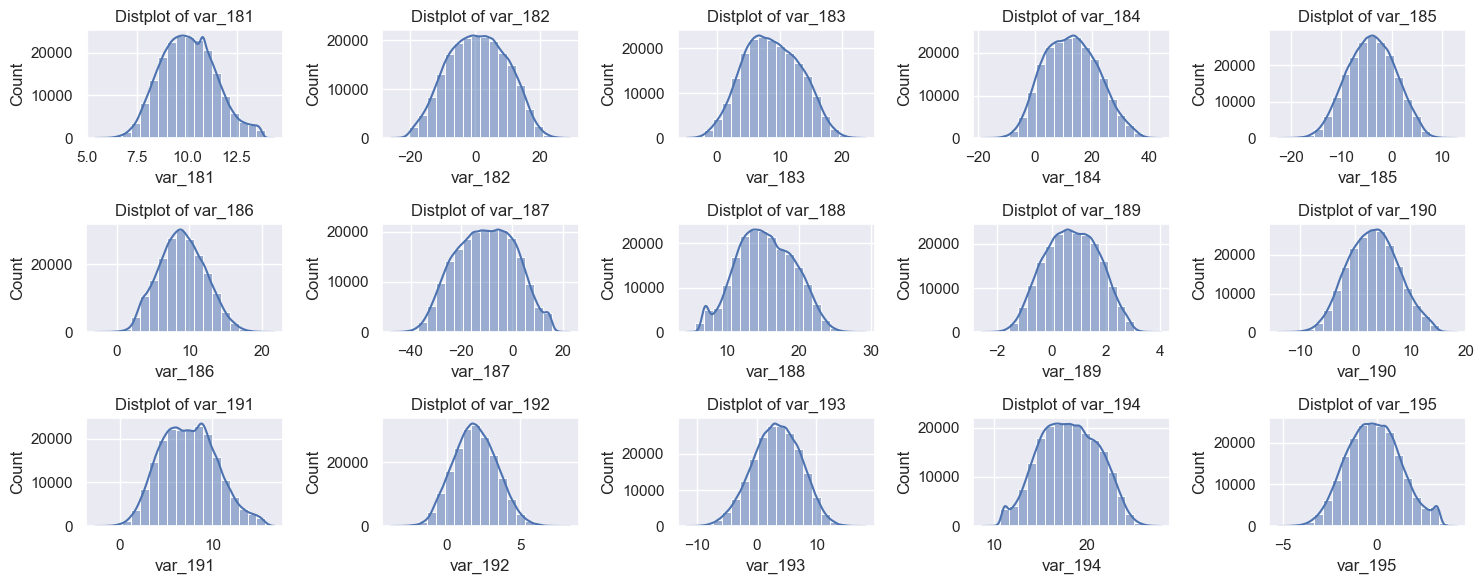

In [41]:
features_to_plot_181_195 = features_list[180:195]  
plot_distribution(bank_ds, features_to_plot_181_195)

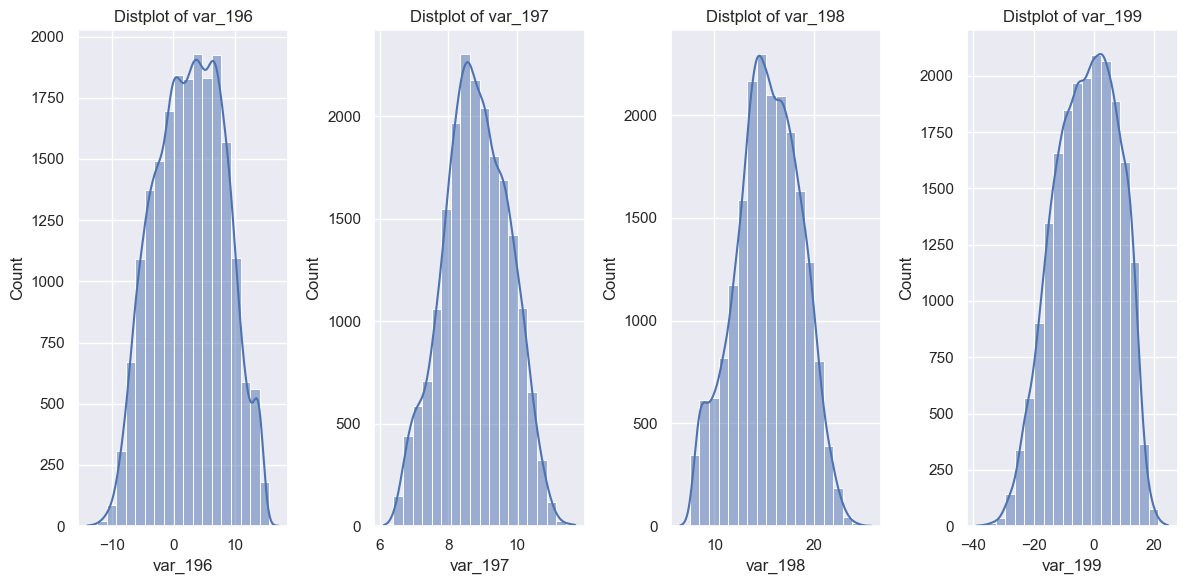

In [27]:
features_to_plot_196_199 = features_list[195:199]  
plot_distribution(bank_ds_1, features_to_plot_196_199)

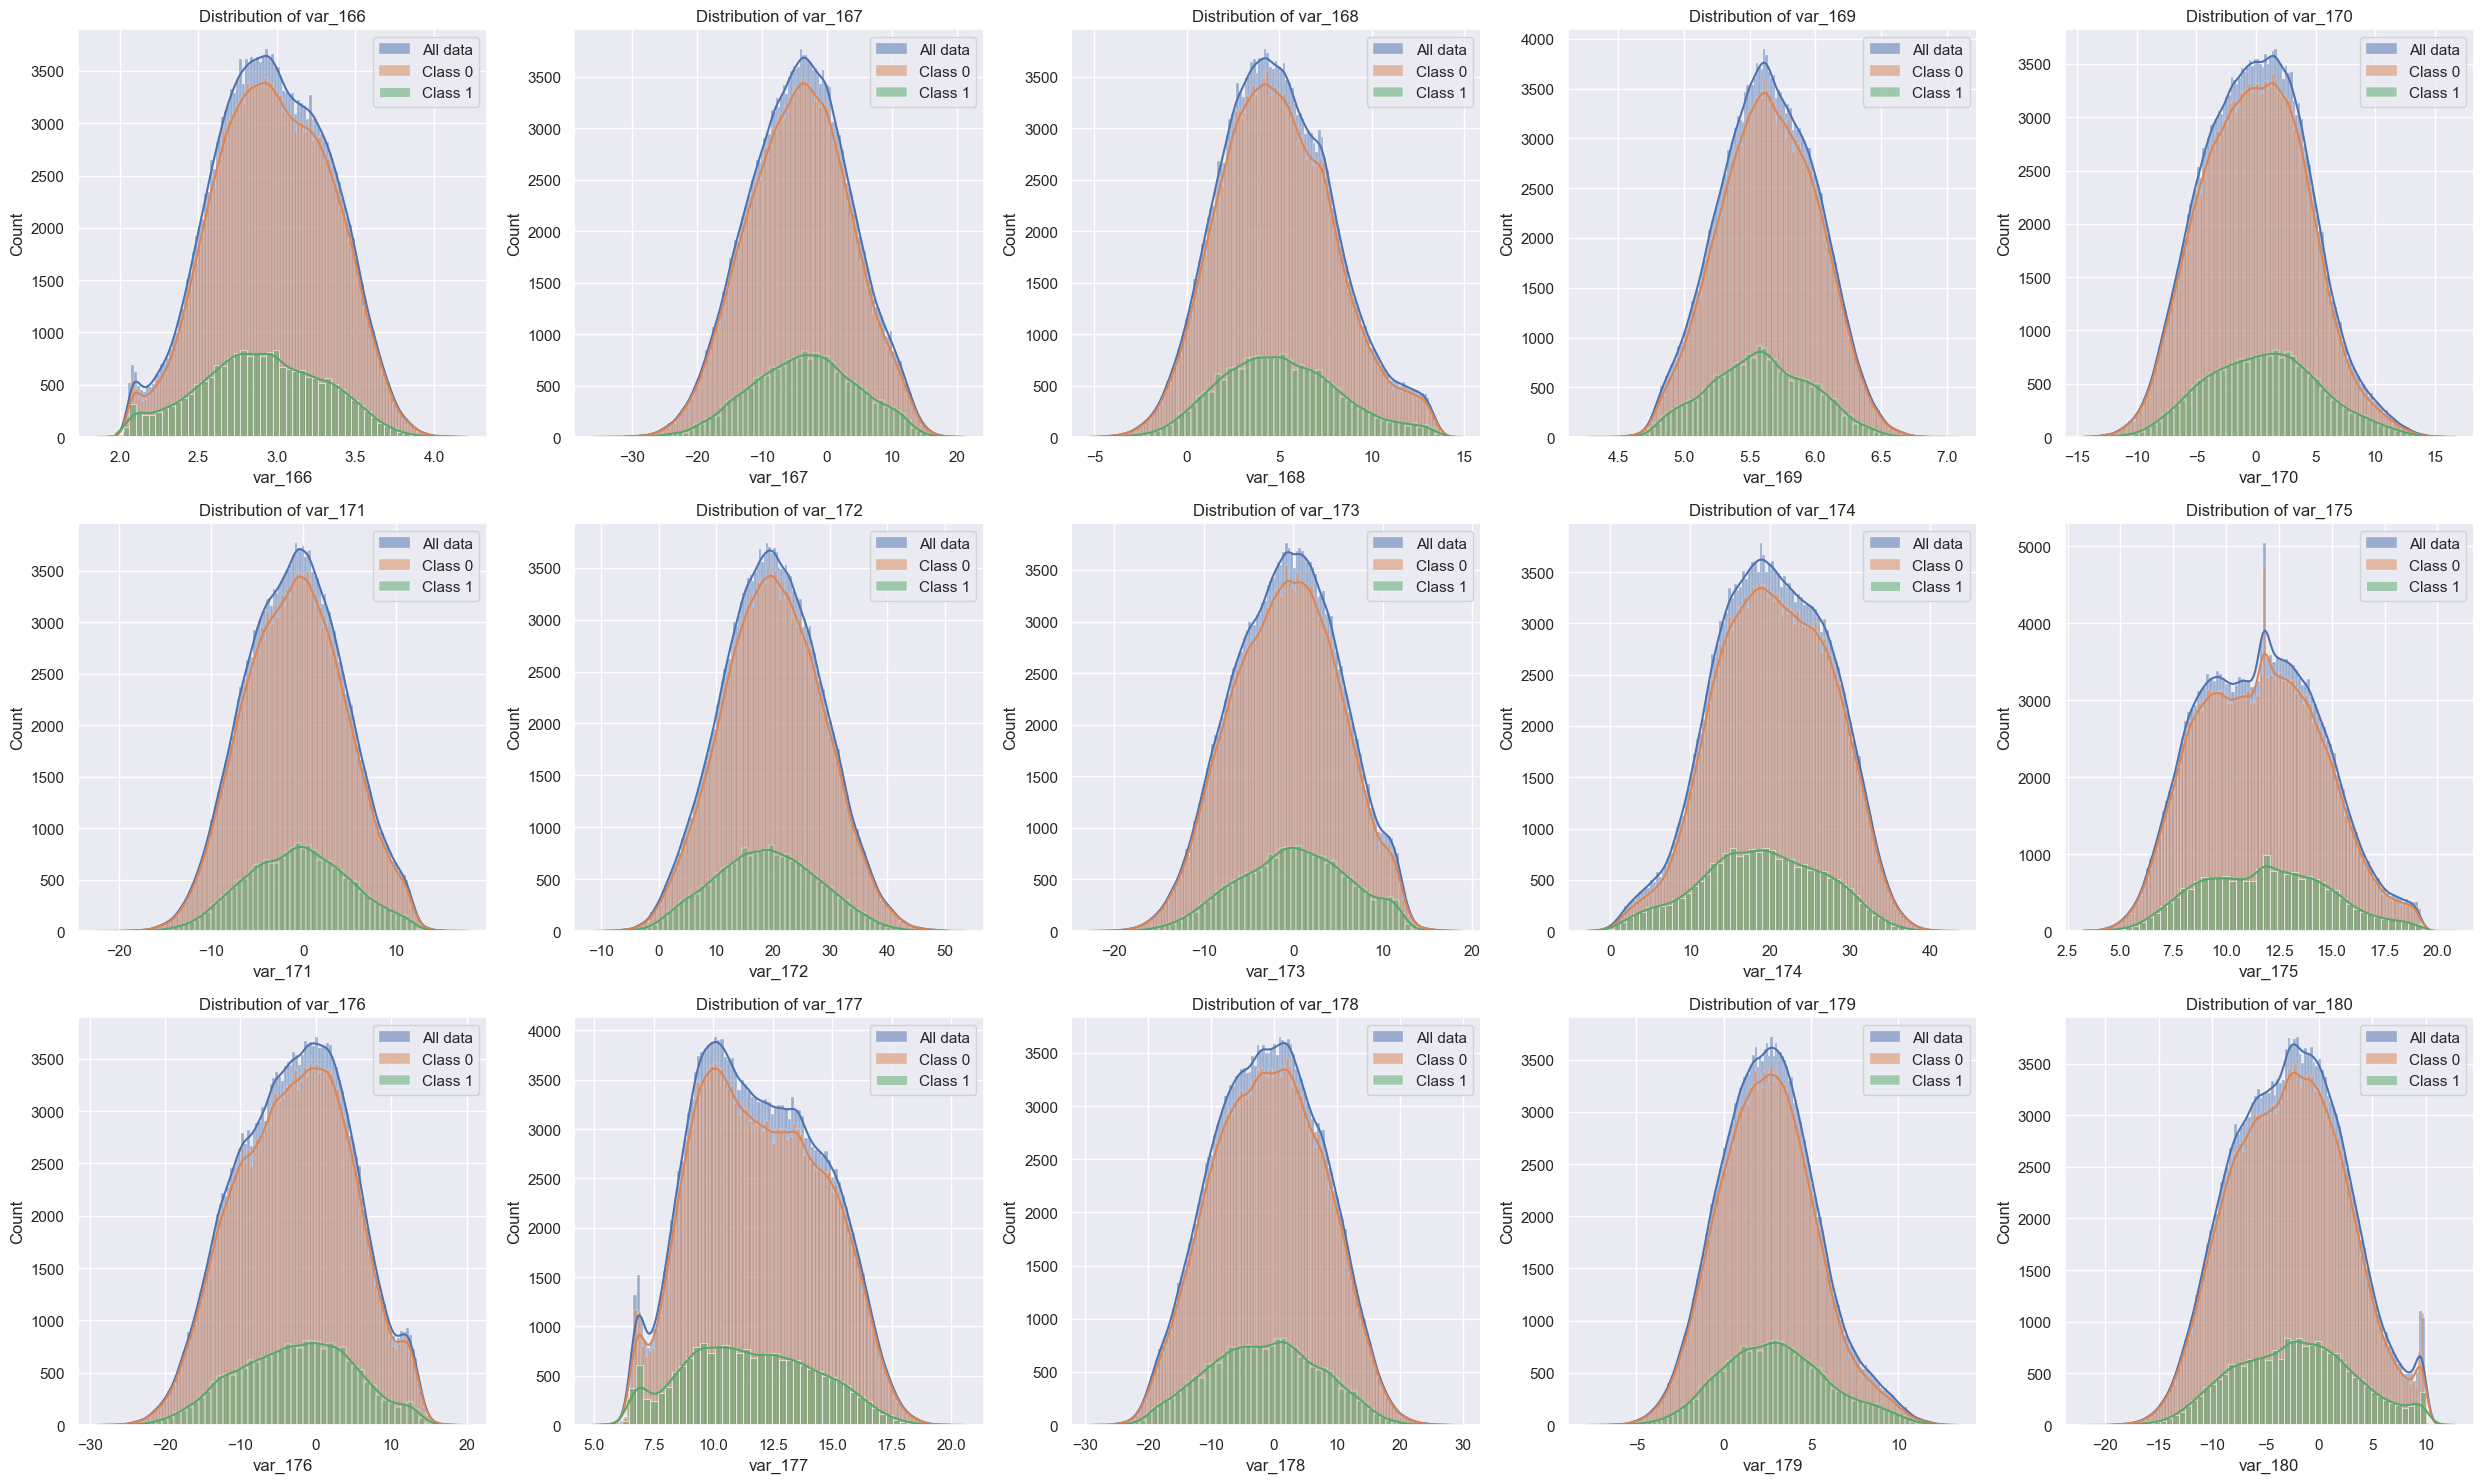

In [37]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

def plot_distribution(data, features, ax, label):
    for feature in features:
        sns.histplot(data[feature], kde=True, ax=ax, label=label)
    ax.legend()

features_to_plot_166_180 = features_list[165:180]

n_cols = 5
n_rows = (len(features_to_plot_166_180) + n_cols - 1) // n_cols
fig, axes = plt.subplots(nrows=n_rows, ncols=n_cols, figsize=(25, 5 * n_rows))

axes = axes.flatten()
for i, feature in enumerate(features_to_plot_166_180):
    plot_distribution(bank_ds, [feature], axes[i], label='All data')
    plot_distribution(bank_ds_0, [feature], axes[i], label='Class 0')
    plot_distribution(bank_ds_1, [feature], axes[i], label='Class 1')
    axes[i].set_title(f'Distribution of {feature}')

for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()


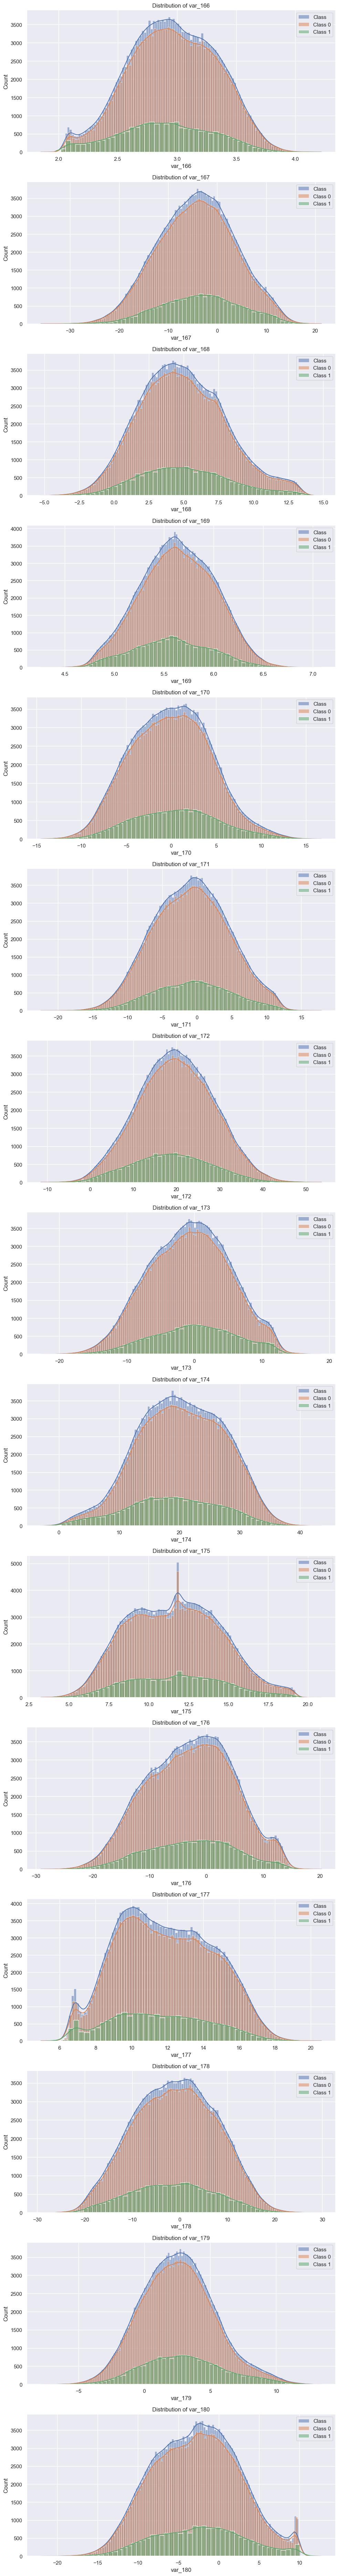

In [34]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming features_list is defined and plot_distribution is your custom function

def plot_distribution(data, features, ax, label):
    for feature in features:
        sns.histplot(data[feature], kde=True, ax=ax, label=label)
    ax.legend()

# Assuming bank_ds_0 and bank_ds_1 are already defined
features_to_plot_166_180 = features_list[165:180]

# Create subplots
fig, axes = plt.subplots(nrows=len(features_to_plot_166_180), ncols=1, figsize=(10, 5 * len(features_to_plot_166_180)))

# Plot for bank_ds_0 and bank_ds_1
for i, feature in enumerate(features_to_plot_166_180):
    plot_distribution(bank_ds, [feature], axes[i], label='All data')
    plot_distribution(bank_ds_0, [feature], axes[i], label='Class 0')
    plot_distribution(bank_ds_1, [feature], axes[i], label='Class 1')
    axes[i].set_title(f'Distribution of {feature}')
    
plt.tight_layout()
plt.show()


##### Boxplots

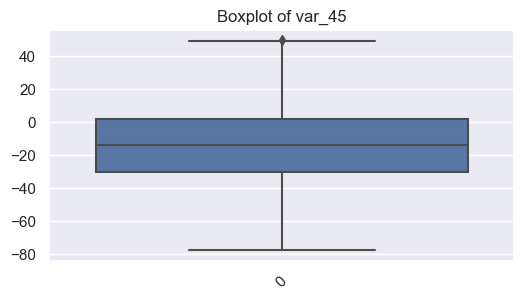

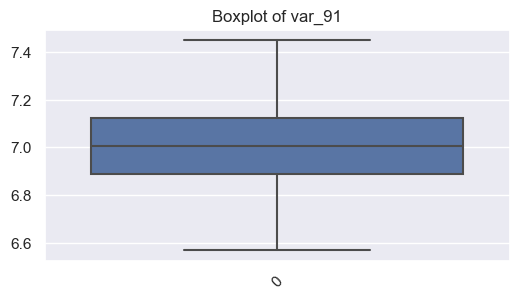

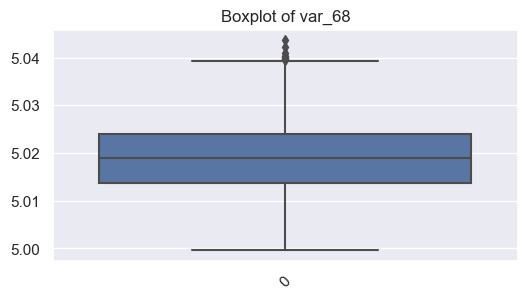

In [29]:
def box_plots(data, features, figsize=(6, 3)):
    plt.figure(figsize=figsize)
    sns.boxplot(data=data[features])
    plt.title('Boxplot of {}'.format(features))
    plt.xticks(rotation=45)
    plt.show()

box_plots(bank_ds_1, 'var_45')
box_plots(bank_ds_1, 'var_91')
box_plots(bank_ds_1, 'var_68')

#### Categorical features

##### cardinality

In [42]:
bank_ds[categorical_features].nunique()

ID_code    200000
dtype: int64

### Target
[top](#Contents)

##### percent of missing data

In [43]:
binary_columns = bank_ds[binary_features]
round(binary_columns.isnull().mean() * 100, 2).sort_values(ascending=False).head(50)

target    0.0
dtype: float64

### compute count per unique value 
[top](#Contents)

In [44]:
bank_ds['target'].value_counts().sort_values

<bound method Series.sort_values of target
0    179902
1     20098
Name: count, dtype: int64>

#### Visualize Data

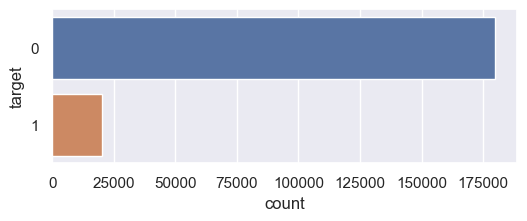

In [45]:
def plot_binary_countplot(data, feature, figsize=(6, 2)):
    plt.figure(figsize=figsize)
    sns.countplot(y=feature, data=data)
    plt.show()

# Plot count plot for each binary feature
for feature in binary_features:
    plot_binary_countplot(bank_ds, feature)

### Balance ratio

In [5]:
# check variable frequency
var = 'target'
(bank_ds[var].value_counts() / len(bank_ds)).sort_values()

target
1    0.10049
0    0.89951
Name: count, dtype: float64

## Dimentionality Reduction

### Correlation methods

In [7]:
#pip install -U matplotlib

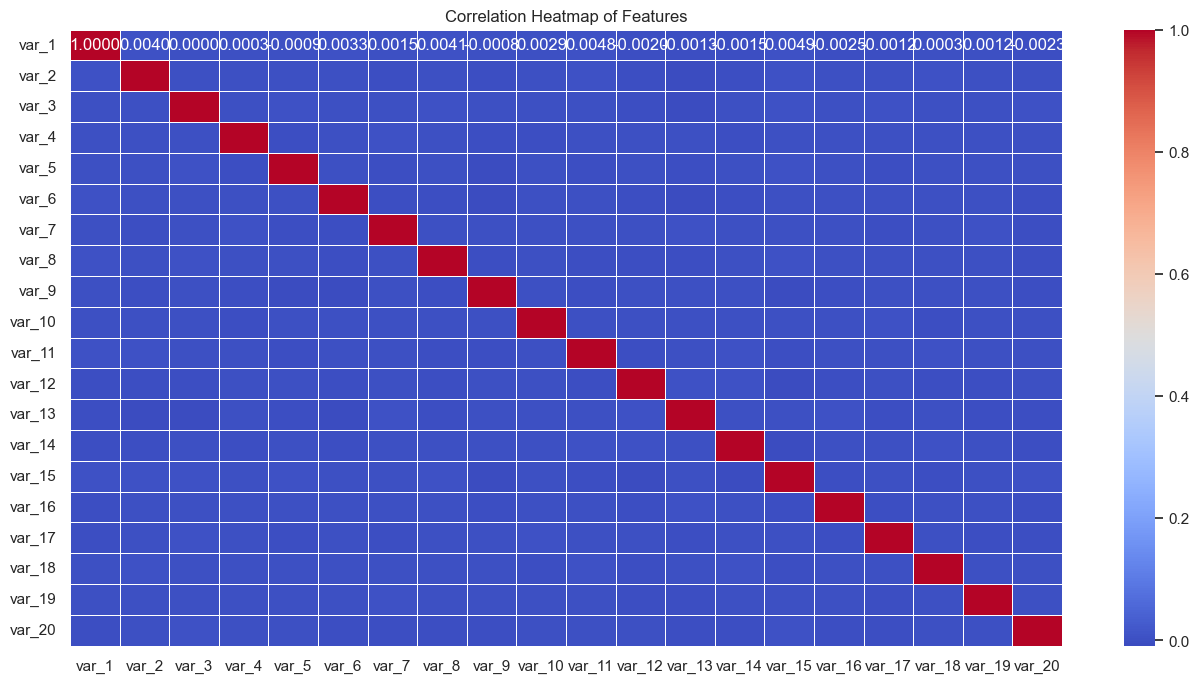

In [53]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming bank_ds is your DataFrame containing var_1 to var_200
selected_features = ['var_{}'.format(i) for i in range(1, 21)]  # Select var_1 to var_200

# Select only the 200 features from the DataFrame
selected_data = bank_ds[selected_features]

# Check if selected_data contains any data
if selected_data.empty:
    print("Selected data is empty.")
else:
    # Compute correlation matrix
    correlation_matrix = selected_data.corr()

    # Check if correlation matrix is empty
    if correlation_matrix.empty:
        print("Correlation matrix is empty.")
    else:
        # Plot correlation heatmap with annotations
        f, ax = plt.subplots(figsize=(16, 8))  # Adjust the figsize if needed
        heatmap = sns.heatmap(correlation_matrix, annot=True, linewidths=0.5, fmt='.4f', cmap='coolwarm', ax=ax)
        plt.title('Correlation Heatmap of Features')
        plt.show()


(10.0, 0.0)

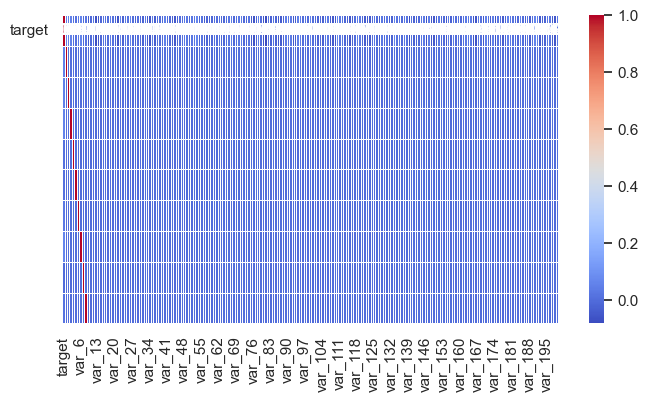

In [52]:
f,ax = plt.subplots(figsize=(8, 4))
sns.heatmap(bank_ds.corr(), annot=True, linewidths=0.5, fmt='.2f',cmap='coolwarm',ax=ax)
ax.set_ylim(10, 0)

### Correlation with target variable

In [ ]:
# Assuming 'column_to_drop' is the name of the column you want to drop
column_to_drop = 'ID_code'

# Drop the column from bank_ds
bank_ds.drop(column_to_drop, axis=1, inplace=True)


In [ ]:
# Selecting the features to include (from var_1 to var_20 and 'target')
features_to_include = ['var_{}'.format(i) for i in range(26, 51)] + ['target']

# Create a new DataFrame bank_new_ds containing only the selected features
bank_2_ds = bank_ds[features_to_include].copy()

# Display the first few rows of bank_new_ds
print(bank_2_ds.head())


In [ ]:
f,ax = plt.subplots(figsize=(16, 8))
sns.heatmap(bank_2_ds.corr(), annot=True, linewidths=0.5, fmt='.3f',cmap='coolwarm',ax=ax)
ax.set_ylim(10, 0)

## Correlation between features

In [30]:
# Assuming 'column_to_drop' is the name of the column you want to drop
column_to_drop = 'ID_code'

# Drop the column from bank_ds
bank_ds_1.drop(column_to_drop, axis=1, inplace=True)

In [32]:
bank_ds_1.corr()

target     var_0     var_1     var_2     var_3     var_4     var_5  \
target      NaN       NaN       NaN       NaN       NaN       NaN       NaN   
var_0       NaN  1.000000 -0.006999  0.008849  0.009614  0.006180  0.001612   
var_1       NaN -0.006999  1.000000  0.013158  0.002270  0.003033 -0.008008   
var_2       NaN  0.008849  0.013158  1.000000  0.000871  0.004585  0.001331   
var_3       NaN  0.009614  0.002270  0.000871  1.000000 -0.006256  0.008778   
...         ...       ...       ...       ...       ...       ...       ...   
var_195     NaN  0.001307 -0.007430 -0.007281 -0.001426 -0.002822  0.004195   
var_196     NaN -0.003051 -0.013159 -0.005307  0.001292  0.004102  0.003439   
var_197     NaN  0.001365 -0.010048 -0.000101 -0.003302  0.004863 -0.005419   
var_198     NaN  0.005461 -0.011637  0.002173  0.000261 -0.006280 -0.010123   
var_199     NaN  0.011323 -0.001418  0.009406  0.000580 -0.004567 -0.018177   

            var_6     var_7     var_8  ...   var_190   var_191   var_192  \
target        NaN       NaN       NaN  ...       NaN       NaN       NaN   
var_0    0.002729 -0.006773  0.004238  ... -0.000696  0.002180  0.003422   
var_1   -0.001056  0.018429  0.000131  ...  0.011146  0.004181  0.007342   
var_2    0.006800  0.009591  0.007025  ... -0.003014  0.000248 -0.014255   
var_3   -0.004265 -0.000117 -0.000176  ... -0.006220  0.014434  0.005436   
...           ...       ...       ...  ...       ...       ...       ...   
var_195  0.003906 -0.001103  0.002059  ...  0.003846 -0.002739 -0.009622   
var_196  0.003766 -0.002568  0.006716  ... -0.004288  0.001157  0.008868   
var_197  0.008405  0.012988 -0.012670  ...  0.000177  0.006348 -0.011717   
var_198  0.000942  0.001622  0.017443  ... -0.004310  0.000412 -0.004249   
var_199 -0.002830  0.000965  0.001247  ... -0.013704  0.006177 -0.007864   

          var_193   var_194   var_195   var_196   var_197   var_198   var_199  
target        NaN       NaN       NaN       NaN       NaN       NaN       NaN  
var_0   -0.013231 -0.003882  0.001307 -0.003051  0.001365  0.005461  0.011323  
var_1    0.001840 -0.004901 -0.007430 -0.013159 -0.010048 -0.011637 -0.001418  
var_2    0.000522 -0.007667 -0.007281 -0.005307 -0.000101  0.002173  0.009406  
var_3    0.001813 -0.000815 -0.001426  0.001292 -0.003302  0.000261  0.000580  
...           ...       ...       ...       ...       ...       ...       ...  
var_195 -0.004077 -0.015797  1.000000 -0.003008  0.006266 -0.003332  0.002982  
var_196 -0.001095 -0.006860 -0.003008  1.000000 -0.018659  0.004713 -0.002218  
var_197  0.011060  0.010872  0.006266 -0.018659  1.000000  0.002334  0.005477  
var_198  0.002798 -0.005849 -0.003332  0.004713  0.002334  1.000000  0.008649  
var_199 -0.000976 -0.001653  0.002982 -0.002218  0.005477  0.008649  1.000000  

[201 rows x 201 columns]

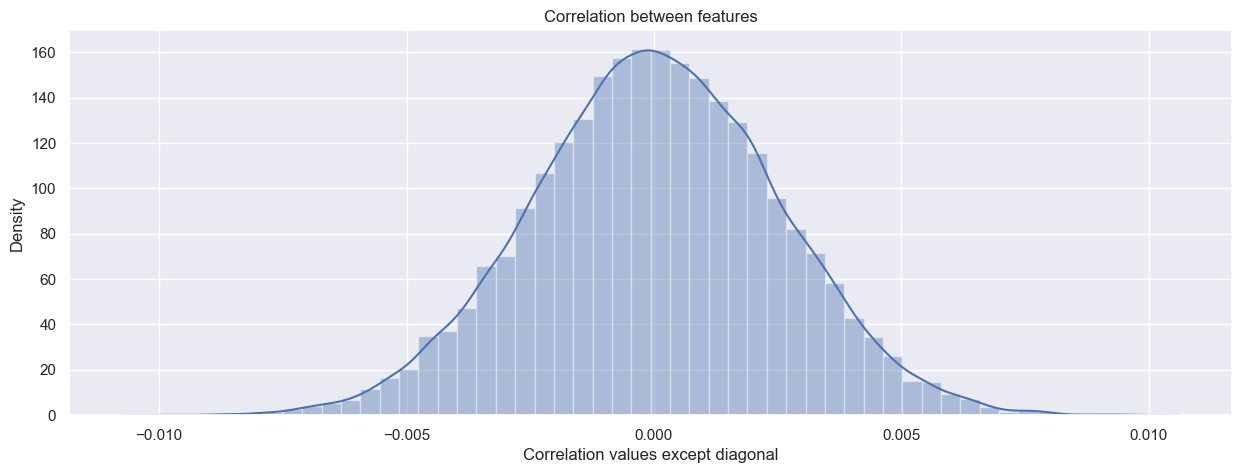

In [10]:
correlation_matrix = bank_ds_0.drop(["target"], axis=1).corr()
correlation_values = correlation_matrix.values.flatten() # Flattening essentially collapses the matrix into a single dimension, creating a list of all correlation coefficients in the matrix
correlation_values = correlation_values[correlation_values != 1] # Filters out the correlation values that are equal to 1. These are the diagonal elements of the correlation matrix, representing the correlation of each feature with itself, which is always 1
plt.figure(figsize=(15,5))
sns.distplot(correlation_values)
plt.xlabel("Correlation values except diagonal")
plt.ylabel("Density")
plt.title("Correlation between features")
plt.show()

## Checking for normality

In [33]:
import pandas as pd
from scipy.stats import shapiro

# Selecting the continuous variables from 'var_0' to 'var_199'
continuous_variables = continuous_features

# Create an empty list to store the normally distributed variables
normally_distributed_variables = []

# Iterate over each continuous variable
for variable in continuous_variables:
    data = bank_ds_1[variable]
    
    # Performing Shapiro-Wilk test for normality
    statistic, p_value = shapiro(data)
    
    # Checking if p-value is greater than significance level
    alpha = 0.05
    if p_value > alpha:
        normally_distributed_variables.append(variable)

# Printing the normally distributed variables if any
if normally_distributed_variables:
    print("Variables with normal distribution:")
    for variable in normally_distributed_variables:
        print(variable)
else:
    print("No normally distributed variables")

No normally distributed variables


## Conclusions so far and action steps

In [ ]:
From distribution plots we can see that features seem to be already transformed, they seem to be normally distributed, which is not confirmed by Shapiro test.
From box plots we can see that outliers exist.
From correlation analysis we can see that features are not correlated with each other, the only target has a slight correlation with other fields.
The data set is imbalanced (10/90)

## Imbalance techniques

In [18]:
pip install -U imbalanced-learn


   ---------------------------------------- 0.0/258.0 kB ? eta -:--:--
   - -------------------------------------- 10.2/258.0 kB ? eta -:--:--
   --- ----------------------------------- 20.5/258.0 kB 217.9 kB/s eta 0:00:02
   ------ -------------------------------- 41.0/258.0 kB 326.8 kB/s eta 0:00:01
   ---------- ---------------------------- 71.7/258.0 kB 438.9 kB/s eta 0:00:01
   ------------------------------------ --- 235.5/258.0 kB 1.2 MB/s eta 0:00:01
   ---------------------------------------- 258.0/258.0 kB 1.2 MB/s eta 0:00:00
  Attempting uninstall: imbalanced-learn
    Found existing installation: imbalanced-learn 0.11.0
    Uninstalling imbalanced-learn-0.11.0:
      Successfully uninstalled imbalanced-learn-0.11.0
